<a href="https://colab.research.google.com/github/JOSHUETDAVID/DATA-_ANALITYC/blob/main/C%C3%B3digo_Python_para_Mostrar_Ciudades_M%C3%A1s_Contaminadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSJAw03Rkfv_P9WqD8TVtL5ETutouhLlet5MhmRMJXAFHrn9DWgVMLRgztHwUsbQBuN1ZyWUMa3_Hou/pub?gid=411800385&single=true&output=csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data.head()

,ID Estacion,Autoridad Ambiental,Estación,Latitud,Longitud,Variable,Unidades,Tiempo de exposición (horas),Año,Promedio,...,Fechas/horas del máximo,Mínimo,Fechas/horas del mínimo,Días de excedencias,Código del Departamento,Nombre del Departamento,Código del Municipio,Nombre del Municipio,Tipo de Estación,Ubicacion
0,9020,AMVA,I.E. COL. COLOMBIA,6.378.517,-75.443.986,DViento,deg,1,2011,256.8,...,29/11/2011 1:00,1.3,29/11/2011 7:00,0,5,antioquia,5308.0,girardota,Fija,POINT (-75.443986 6.378517)
1,9020,AMVA,I.E. COL. COLOMBIA,6.378.517,-75.443.986,DViento,deg,24,2011,257.4,...,16/11/2011 0:00,99.7,8/11/2011 0:00,0,5,antioquia,5308.0,girardota,Fija,POINT (-75.443986 6.378517)
2,9020,AMVA,I.E. COL. COLOMBIA,6.378.517,-75.443.986,PLiquida,mm,1,2011,4.0,...,20/12/2011 2:00,1.5,07/11/2011 23:00:00 - 08/11/2011 05:00:00 - 13...,0,5,antioquia,5308.0,girardota,Fija,POINT (-75.443986 6.378517)
3,9020,AMVA,I.E. COL. COLOMBIA,6.378.517,-75.443.986,P,mmHg,1,2011,645.9,...,12/09/2011 10:00,641.6,27/10/2011 17:00,0,5,antioquia,5308.0,girardota,Fija,POINT (-75.443986 6.378517)
4,9020,AMVA,I.E. COL. COLOMBIA,6.378.517,-75.443.986,P,mmHg,24,2011,645.9,...,20/10/2011 0:00,644.0,27/10/2011 0:00,0,5,antioquia,5308.0,girardota,Fija,POINT (-75.443986 6.378517)


In [8]:
agrupar_los_municipios = data.groupby('Nombre del Municipio')

In [9]:
agrupar_los_municipios

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID Estacion                           13940 non-null  int64  
 1   Autoridad Ambiental                   13940 non-null  object 
 2   Estación                              13940 non-null  object 
 3   Latitud                               13940 non-null  object 
 4   Longitud                              13940 non-null  object 
 5   Variable                              13940 non-null  object 
 6   Unidades                              13940 non-null  object 
 7   Tiempo de exposición (horas)          13940 non-null  int64  
 8   Año                                   13940 non-null  int64  
 9   Promedio                              13940 non-null  float64
 10  Suma                                  13940 non-null  object 
 11  No. de datos   

<ipython-input-11-862b278558a1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)
<ipython-input-11-862b278558a1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)


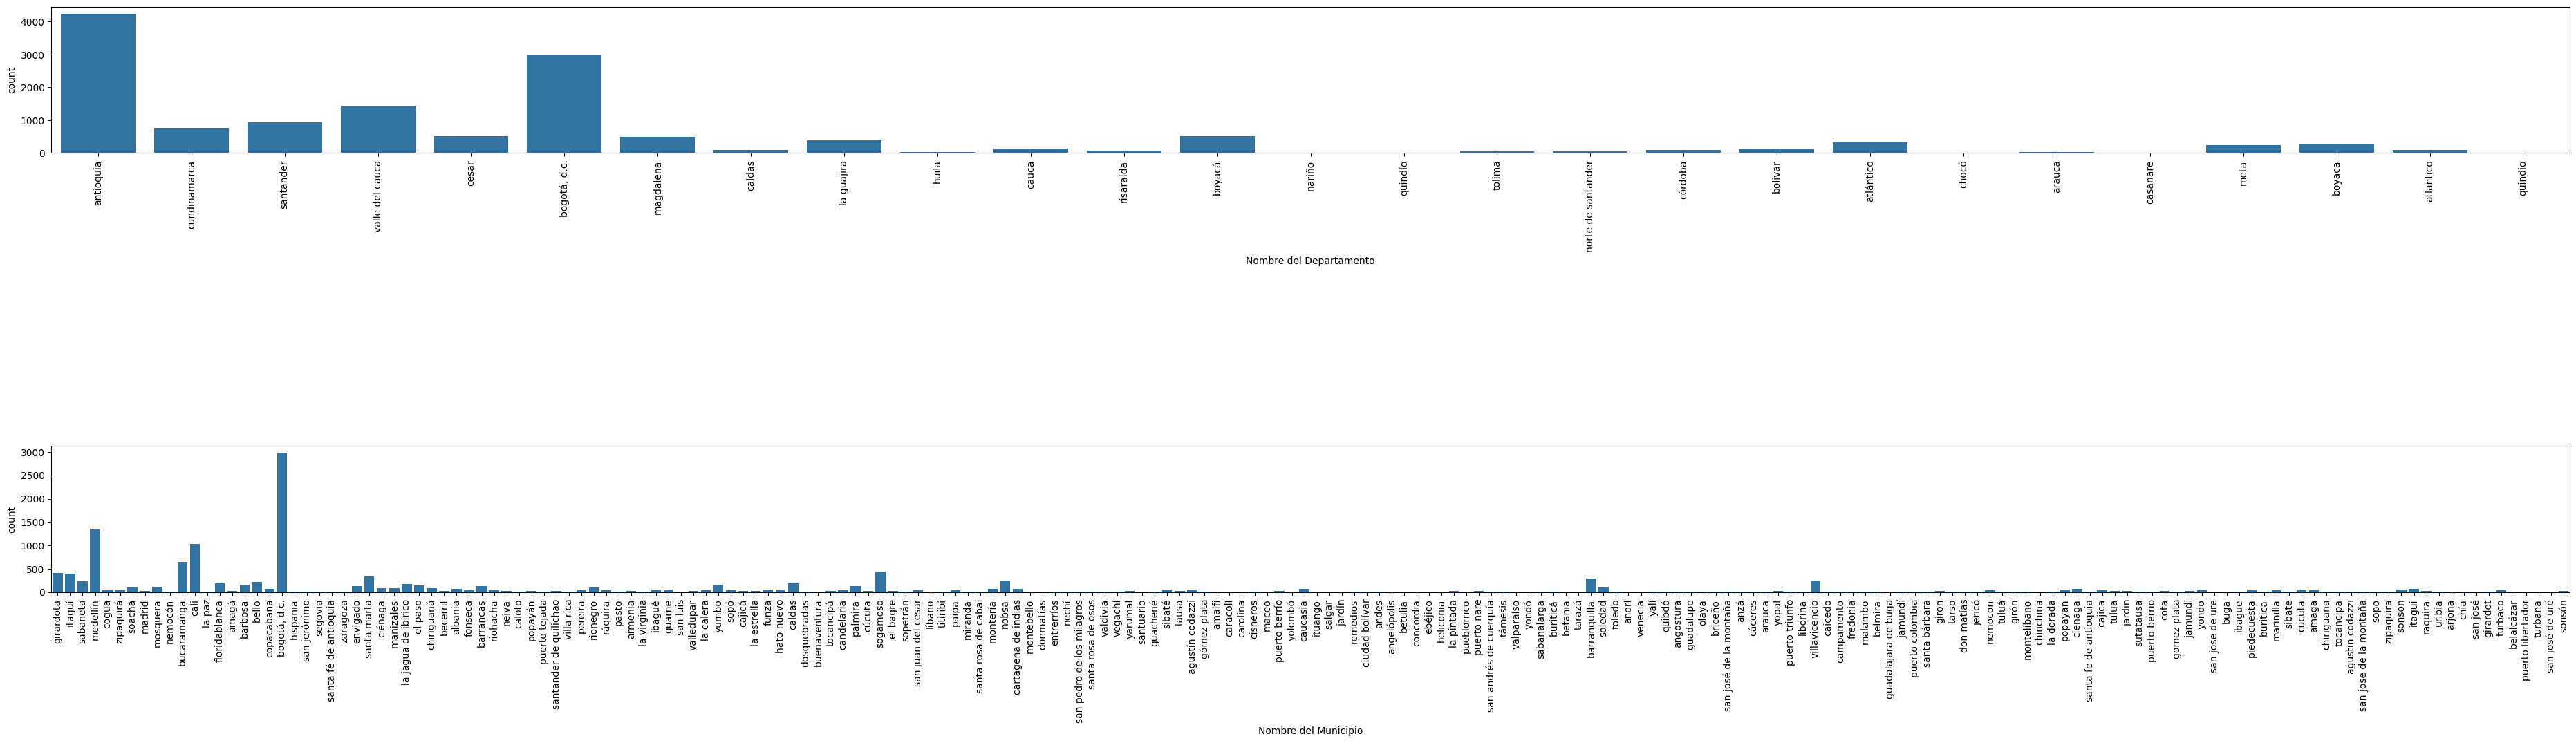

In [11]:
departamento_y_municipio = ['Nombre del Departamento', 'Nombre del Municipio']
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize = (47,11))
fig.subplots_adjust(hspace = 2)
for i,col in enumerate(departamento_y_municipio):
  sns.countplot(x = col, data = data, ax = ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)

<ipython-input-12-c34e60a58fdb>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)
<ipython-input-12-c34e60a58fdb>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)


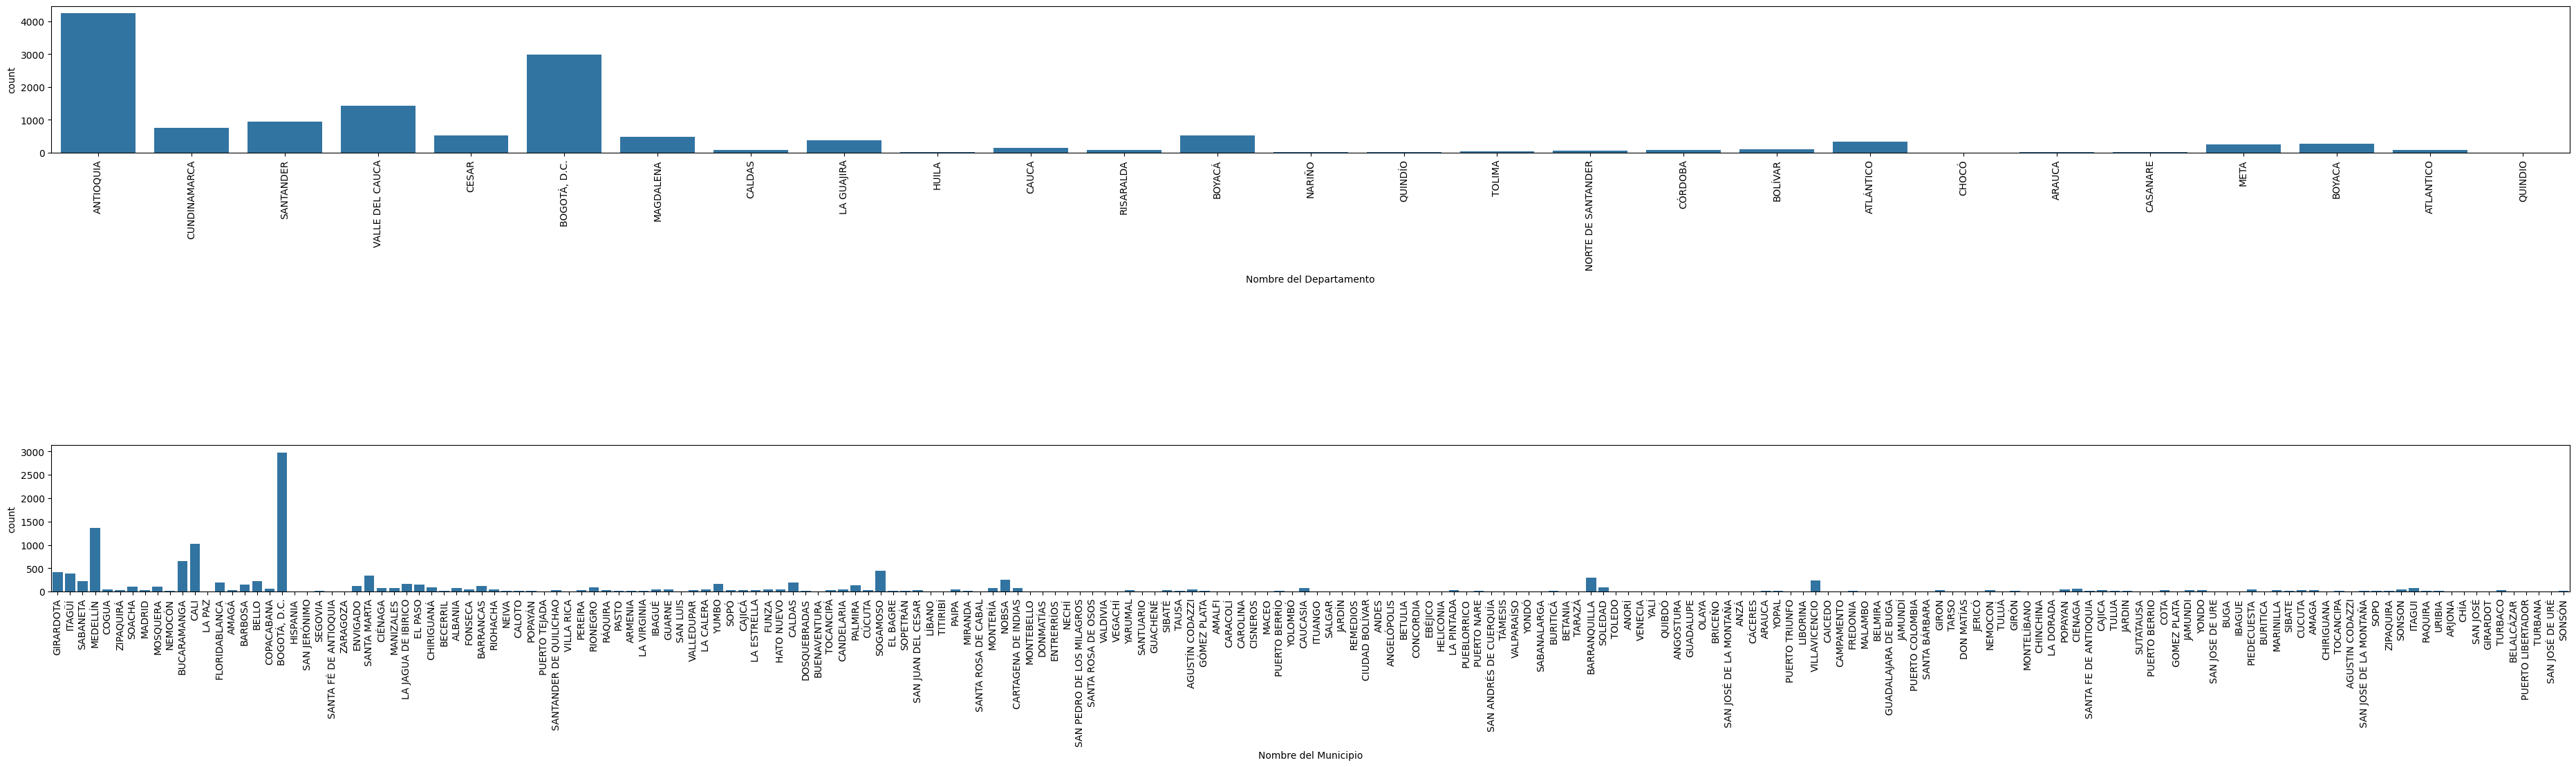

In [12]:
for colums in data.columns:
  if colums in departamento_y_municipio:
    data[colums] = data[colums].str.upper()
# volvemos a graficar
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize = (47,11))
fig.subplots_adjust(hspace = 2)
for i,col in enumerate(departamento_y_municipio):
  sns.countplot(x = col, data = data, ax = ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 90)

In [13]:
print(data['Nombre del Departamento'].unique())
data['Nombre del Departamento'] = data['Nombre del Departamento'].str.replace('bogota, d.c.', 'bogotá, d.c.')
data['Nombre del Departamento'] = data['Nombre del Departamento'].str.replace('cordoba', 'córdoba')
data['Nombre del Departamento'] = data['Nombre del Departamento'].str.replace('atlantico', 'atlántico')
data['Nombre del Departamento'] = data['Nombre del Departamento'].str.replace('boyaca', 'boyacá')
data['Nombre del Departamento'] = data['Nombre del Departamento'].str.replace('quindio', 'quindío')


print(data['Nombre del Departamento'].unique())

['ANTIOQUIA' 'CUNDINAMARCA' 'SANTANDER' 'VALLE DEL CAUCA' 'CESAR'
 'BOGOTÁ, D.C.' 'MAGDALENA' 'CALDAS' 'LA GUAJIRA' 'HUILA' 'CAUCA'
 'RISARALDA' 'BOYACÁ' 'NARIÑO' 'QUINDÍO' 'TOLIMA' 'NORTE DE SANTANDER'
 'CÓRDOBA' 'BOLÍVAR' 'ATLÁNTICO' 'CHOCÓ' 'ARAUCA' 'CASANARE' 'META'
 'BOYACA' 'ATLANTICO' 'QUINDIO']
['ANTIOQUIA' 'CUNDINAMARCA' 'SANTANDER' 'VALLE DEL CAUCA' 'CESAR'
 'BOGOTÁ, D.C.' 'MAGDALENA' 'CALDAS' 'LA GUAJIRA' 'HUILA' 'CAUCA'
 'RISARALDA' 'BOYACÁ' 'NARIÑO' 'QUINDÍO' 'TOLIMA' 'NORTE DE SANTANDER'
 'CÓRDOBA' 'BOLÍVAR' 'ATLÁNTICO' 'CHOCÓ' 'ARAUCA' 'CASANARE' 'META'
 'BOYACA' 'ATLANTICO' 'QUINDIO']


In [14]:
print(data['Nombre del Municipio'].unique())
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('bogota, d.c.', 'bogotá, d.c.')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('medellin', 'medellín')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('monteria', 'montería')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('agustin codazzi', 'agustín codazzi')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('amaga', 'amagá')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('buritica', 'buriticá')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('cajica', 'cajicá')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('chiriguana', 'chiriguaná')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('cienaga', 'ciénaga')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('cucuta', 'cúcuta')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('donmatías', 'don matías')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('dosquebradas', 'dos quebradas')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('girardota', 'girardot')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('giron', 'girón')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('gomez plata', 'gómez plata')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('ibague', 'ibagué')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('itaguí', 'itagüí')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('jamundi', 'jamundí')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('jardin', 'jardín')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('nemocon', 'nemocón')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('popayan', 'popayán')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('Pueblorrico', 'Pueblo rico')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('puerto berrio', 'puerto berrío')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('raquira', 'ráquira')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('rionegro', 'rio negro')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('sabanalarga', 'sabana larga')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('san jose de la montaña', 'san josé de la montaña')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('san jose de ure', 'san josé de uré')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('santa fé de antioquia', 'santa fé de antioquía')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('sibate', 'sibaté')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('sonson', 'sonsón')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('sopo', 'sopó')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('tocancipa', 'tocancipá')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('tulua', 'tuluá')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('yondo', 'yondó')
data['Nombre del Municipio'] = data['Nombre del Municipio'].str.replace('zipaquira', 'zipaquirá')

print(data['Nombre del Municipio'].unique())

['GIRARDOTA' 'ITAGÜÍ' 'SABANETA' 'MEDELLÍN' 'COGUA' 'ZIPAQUIRÁ' 'SOACHA'
 'MADRID' 'MOSQUERA' 'NEMOCÓN' 'BUCARAMANGA' 'CALI' 'LA PAZ'
 'FLORIDABLANCA' 'AMAGÁ' 'BARBOSA' 'BELLO' 'COPACABANA' 'BOGOTÁ, D.C.'
 'HISPANIA' 'SAN JERÓNIMO' 'SEGOVIA' 'SANTA FÉ DE ANTIOQUIA' 'ZARAGOZA'
 'ENVIGADO' 'SANTA MARTA' 'CIÉNAGA' 'MANIZALES' 'LA JAGUA DE IBIRICO'
 'EL PASO' 'CHIRIGUANÁ' 'BECERRIL' 'ALBANIA' 'FONSECA' 'BARRANCAS'
 'RIOHACHA' 'NEIVA' 'CALOTO' 'POPAYÁN' 'PUERTO TEJADA'
 'SANTANDER DE QUILICHAO' 'VILLA RICA' 'PEREIRA' 'RIONEGRO' 'RÁQUIRA'
 'PASTO' 'ARMENIA' 'LA VIRGINIA' 'IBAGUÉ' 'GUARNE' 'SAN LUIS' 'VALLEDUPAR'
 'LA CALERA' 'YUMBO' 'SOPÓ' 'CAJICÁ' 'LA ESTRELLA' 'FUNZA' 'HATO NUEVO'
 'CALDAS' 'DOSQUEBRADAS' 'BUENAVENTURA' 'TOCANCIPÁ' 'CANDELARIA' 'PALMIRA'
 'CÚCUTA' 'SOGAMOSO' 'EL BAGRE' 'SOPETRÁN' 'SAN JUAN DEL CESAR' 'LÍBANO'
 'TITIRIBÍ' 'PAIPA' 'MIRANDA' 'SANTA ROSA DE CABAL' 'MONTERÍA' 'NOBSA'
 'CARTAGENA DE INDIAS' 'MONTEBELLO' 'DONMATÍAS' 'ENTRERRÍOS' 'NECHÍ'
 'SAN PEDRO DE LOS MILAGRO

In [ ]:
data.to_csv("Datos del aire limpios.csv", index=False)
